<a href="https://colab.research.google.com/github/suajeong52/collapsible_tube/blob/main/collap_all(%EC%B4%88%EA%B8%B0%EA%B0%92).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sciann

     |████████████████████████████████| 174 kB 4.7 MB/s 
     |████████████████████████████████| 460.3 MB 8.1 kB/s 
     |████████████████████████████████| 561 kB 68.4 MB/s 
     |████████████████████████████████| 14.8 MB 46.5 MB/s 
     |████████████████████████████████| 4.0 MB 55.9 MB/s 
     |████████████████████████████████| 462 kB 68.2 MB/s 
     |████████████████████████████████| 132 kB 60.9 MB/s 
     |████████████████████████████████| 1.2 MB 54.0 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68720 sha256=14e1e60bcdff27620b234ead03b3796231c4b20fc023f8a7f47c8525dcde1102
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: numpy
    Found existin

In [ ]:
import numpy as np 
import sciann as sn 
import matplotlib.pyplot as plt  
from numpy import pi
from sciann.utils.math import diff, sign, sin, sqrt, pow

---------------------- SCIANN 0.6.6.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.5.3 
Python Version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0] 



In [ ]:
x = sn.Variable('x')
t = sn.Variable('t')
u = sn.Functional('u', [x,t],8*[20], 'tanh')
A = sn.Functional('A', [x,t],  8*[20], 'relu')

In [ ]:
L1 = diff(A, t) + u * diff(A, x) + A * diff(u, x) - (0.01/pi)*diff(u, x, order=2) - (0.01/pi)*diff(A, x, order=2) 

In [ ]:
rho = 1
#beta = 200
beta = 1

L2 = diff(u, t) + u * diff(u, x) + (beta / (2 * rho * sn.pow(A * A + 0.01, 0.25)))* diff(A, x, order=1) - (0.01/pi)*diff(u, x, order=2) - (0.01/pi)*diff(A, x, order=2)  

In [ ]:
TOL = 0.001
T = 10
omega = 2 * np.pi / T
C1 = (1 - sign(t - TOL)) * (u - 1)

C2 = (1 - sign(t - TOL)) * (A - 1)

C3 = (1 - sign(x - TOL)) * (u - 0.2*sin(2*np.pi* t) - 1)
C4 = (1 - sign(x - TOL)) * (A - 1)
C5 = (1 + sign(x - 1 + TOL)) * (u - diff(u,x))

In [ ]:
m = sn.SciModel([x,t], [L1, L2, C1, C2, C3, C4,C5], loss_func="mse", optimizer="Adam")

In [ ]:
x_data, t_data = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(0, 1, 100)
)

In [ ]:
h = m.train([x_data,t_data], 7*['zero'], learning_rate=0.0005, epochs=2000, verbose=1, shuffle=True)


Total samples: 10000 
Batch size: 64 
Total batches: 157 

Epoch 1/2000
157/157 [==============================] - 23s 57ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0786 - sub_2_loss: 0.0034 - sub_4_loss: 0.0047 - mul_11_loss: 0.0127 - mul_12_loss: 0.0175 - mul_15_loss: 0.0142 - mul_16_loss: 0.0200 - mul_17_loss: 0.0060 - lr: 5.0000e-04 - time: 22.7208
Epoch 2/2000
157/157 [==============================] - 8s 49ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0261 - sub_2_loss: 0.0030 - sub_4_loss: 0.0016 - mul_11_loss: 0.0032 - mul_12_loss: 3.5699e-04 - mul_15_loss: 0.0061 - mul_16_loss: 8.3656e-04 - mul_17_loss: 0.0111 - lr: 5.0000e-04 - time: 7.6784
Epoch 3/2000
157/157 [==============================] - 7s 43ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0240 - sub_2_loss: 0.0023 - sub_4_loss: 9.7314e-04 - mul_11_loss: 0.0021 - mul_12_loss: 8.3799e-05 - mul_15_loss: 0.0057 - mul_16_loss: 3.0896e-04 - mul_17_loss: 0.0126 - lr: 5.0000e-04 - time: 6.8010
Epoch 4/2000
15

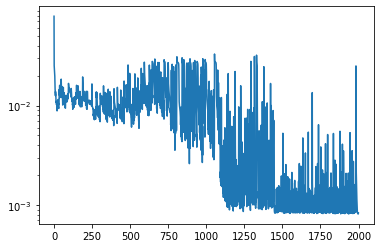

In [ ]:
plt.semilogy(h.history['loss'])

<function matplotlib.pyplot.show>

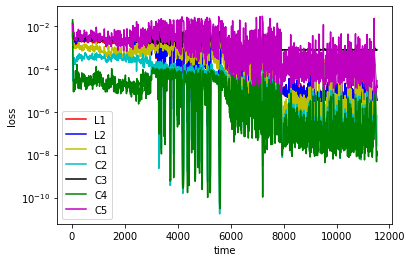

In [ ]:
time = np.cumsum(h.history['time'])
#plt.semilogy(time, h.history['loss'],'m')
plt.semilogy(time, h.history['sub_2_loss'],'r')
plt.semilogy(time, h.history['sub_4_loss'],'b')
plt.semilogy(time, h.history['mul_11_loss'],'y')
plt.semilogy(time, h.history['mul_12_loss'],'c')
plt.semilogy(time, h.history['mul_15_loss'],'k')
plt.semilogy(time, h.history['mul_16_loss'],'g')
plt.semilogy(time, h.history['mul_17_loss'],'m')

plt.legend(['L1','L2','C1','C2', 'C3','C4','C5'])
plt.xlabel('time')
plt.ylabel('loss')
plt.show

(0.8, 1.2)

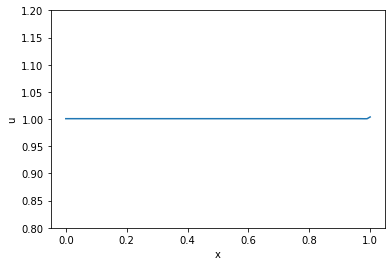

In [ ]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(0, 0, 1)
)
u_pred = u.eval(m, [x_test, t_test])
A_pred = A.eval(m, [x_test, t_test])
u_pred = np.reshape(u_pred,100)
A_pred = np.reshape(A_pred,100)
x_test = np.reshape(x_test, 100)

plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(0.8, 1.2)

Text(0, 0.5, 'A')

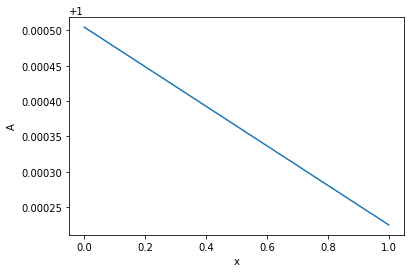

In [ ]:

plt.plot(x_test, A_pred)
plt.xlabel('x')
plt.ylabel('A')

(0.8, 1.2)

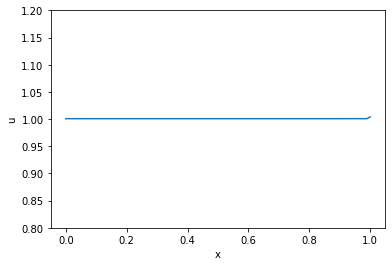

In [ ]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(0.25, 0.25, 1)
)
u_pred = u.eval(m, [x_test, t_test])
A_pred = A.eval(m, [x_test, t_test])
u_pred = np.reshape(u_pred,100)
A_pred = np.reshape(A_pred,100)
x_test = np.reshape(x_test, 100)

plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(0.8, 1.2)

Text(0, 0.5, 'A')

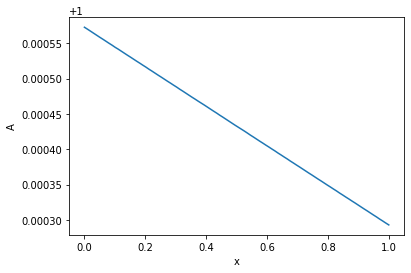

In [ ]:
plt.plot(x_test, A_pred)
plt.xlabel('x')
plt.ylabel('A')

(0.8, 1.2)

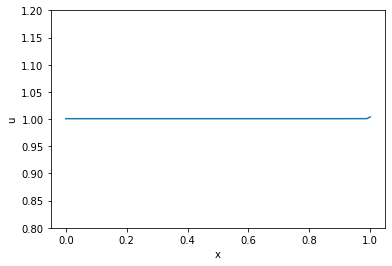

In [ ]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(0.5, 0.5, 1)
)
u_pred = u.eval(m, [x_test, t_test])
A_pred = A.eval(m, [x_test, t_test])
u_pred = np.reshape(u_pred,100)
A_pred = np.reshape(A_pred,100)
x_test = np.reshape(x_test, 100)



plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(0.8, 1.2)

Text(0, 0.5, 'A')

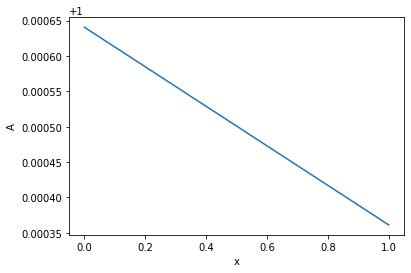

In [ ]:
plt.plot(x_test, A_pred)
plt.xlabel('x')
plt.ylabel('A')

(0.8, 1.2)

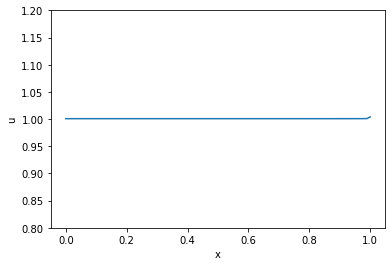

In [ ]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(1, 1, 1)
)
u_pred = u.eval(m, [x_test, t_test])
A_pred = A.eval(m, [x_test, t_test])
u_pred = np.reshape(u_pred,100)
A_pred = np.reshape(A_pred,100)
x_test = np.reshape(x_test, 100)



plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(0.8, 1.2)

Text(0, 0.5, 'A')

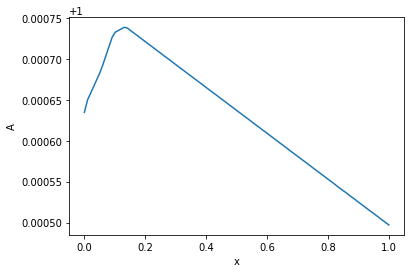

In [ ]:
plt.plot(x_test, A_pred)
plt.xlabel('x')
plt.ylabel('A')